<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('/content/sample_data/train.csv', index_col='id')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [29]:
df = pd.get_dummies(df)

In [30]:
# split to train and test
df_train = df.sample(frac=0.7, random_state=0)
df_test = df.drop(df_train.index)
df_train.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
67937,0.4375,0.3250,0.1375,0.907184,0.354369,0.184272,0.283495,5,0,0,1
8479,1.4125,1.1750,0.3875,31.567168,11.977664,6.591259,9.780577,13,0,0,1
31750,1.1875,0.9750,0.3250,15.124458,7.044851,3.104270,4.394172,8,0,1,0
73945,1.5250,1.2125,0.4125,30.716683,11.878440,6.010094,8.930093,13,1,0,0
52917,1.3625,1.1250,0.3250,23.090668,11.424848,4.861939,6.038443,11,0,0,1


In [31]:
df_test.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10,0,0,1
8,1.6000,1.2875,0.4375,38.824640,16.967176,7.413394,10.772810,12,1,0,0
10,0.9250,0.7250,0.2125,6.109317,2.693202,1.729319,2.126212,7,0,1,0
12,1.3500,1.0250,0.3500,20.964455,8.504850,4.635143,6.945627,10,0,0,1


In [32]:
# scale to range from 0 to 1
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

max2_ = df_train.max(axis=0)
min2_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_test = (df_test - min2_) / (max2_ - min2_)

In [33]:
X_train = df_train.drop('Age', axis=1)
X_test = df_test.drop('Age', axis=1)

y_train = df_train['Age']
y_test = df_test['Age']

In [34]:
# there's an interesting callback in keras

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stopping_callback = EarlyStopping(min_delta=0.0001,  # min_delta - minimal decreasing of loss we look at
                                        patience=20,  # check if loss decreased min_delta each patience epochs (in our case 20)
                                        restore_best_weights=True)

In [37]:
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
])

In [38]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [39]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping_callback], # put your callbacks in a list
    verbose=0,  # turn off training log
)

Minimum validation loss: 0.049276016652584076


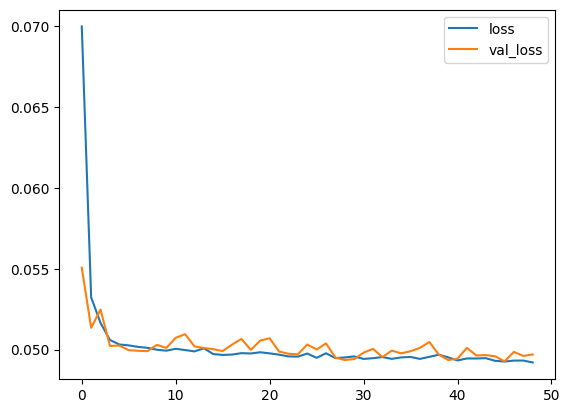

In [40]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(f"Minimum validation loss: {history_df['val_loss'].min()}")

In [41]:
# as we can see on plot
# we set epochs to 500, but it took only 50 epochs with pretty good results

In [42]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    verbose=0,  # turn off training log
)

Minimum validation loss: 0.048725277185440063


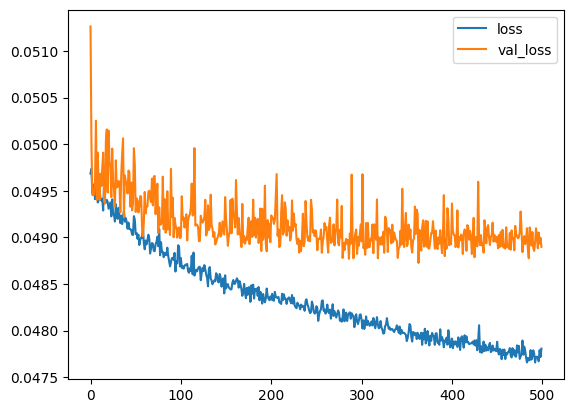

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(f"Minimum validation loss: {history_df['val_loss'].min()}")



# **You see?!** <br>
# **It's overfitted as shi...**

**That's why we should use EarlyStoppingCallback**

Training accuracy: 99.7684 <br>
Validation accuracy: 5.0946 <br>
<img src='https://media.tenor.com/eE2OLGiBR-QAAAAd/transitions-kinemaster.gif' width=30%>